# Exploratory Data Analysis (EDA)

## Table of Contents
1. [Dataset Overview](#dataset-overview)
2. [Handling Missing Values](#handling-missing-values)
3. [Feature Distributions](#feature-distributions)
4. [Possible Biases](#possible-biases)
5. [Correlations](#correlations)


. [Correlations](#correlations)


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Dataset Overview

[Provide a high-level overview of the dataset. This should include the source of the dataset, the number of samples, the number of features, and example showing the structure of the dataset.]


## Load and merge the datasets

In [3]:
df = pd.read_csv('../Data\Load_21-24.csv')

<>:1: SyntaxWarning: invalid escape sequence '\L'
<>:1: SyntaxWarning: invalid escape sequence '\L'
C:\Users\TimPr\AppData\Local\Temp\ipykernel_1496\49942854.py:1: SyntaxWarning: invalid escape sequence '\L'
  df = pd.read_csv('../Data\Load_21-24.csv')


In [ ]:
df.head()

,Time (CET/CEST),Day-ahead Total Load Forecast [MW] - BZN|DE-LU,Actual Total Load [MW] - BZN|DE-LU
0,01.01.2021 00:00 - 01.01.2021 00:15,43935.0,45458.0
1,01.01.2021 00:15 - 01.01.2021 00:30,43738.0,45237.0
2,01.01.2021 00:30 - 01.01.2021 00:45,43247.0,44886.0
3,01.01.2021 00:45 - 01.01.2021 01:00,43162.0,44585.0
4,01.01.2021 01:00 - 01.01.2021 01:15,42453.0,43952.0


## Data dimensions and description:

In [5]:
# Number of samples
num_samples = df.shape[0]

# Number of features
num_features = df.shape[1]

# Display these dataset characteristics
print(f"Number of samples: {num_samples}")
print(f"Number of features: {num_features}")

# Display the first few rows of the dataframe to show the structure
print("Example data:")
print(df.head())



Number of samples: 140272
Number of features: 3
Example data:
                       Time (CET/CEST)  \
0  01.01.2021 00:00 - 01.01.2021 00:15   
1  01.01.2021 00:15 - 01.01.2021 00:30   
2  01.01.2021 00:30 - 01.01.2021 00:45   
3  01.01.2021 00:45 - 01.01.2021 01:00   
4  01.01.2021 01:00 - 01.01.2021 01:15   

  Day-ahead Total Load Forecast [MW] - BZN|DE-LU  \
0                                        43935.0   
1                                        43738.0   
2                                        43247.0   
3                                        43162.0   
4                                        42453.0   

  Actual Total Load [MW] - BZN|DE-LU  
0                            45458.0  
1                            45237.0  
2                            44886.0  
3                            44585.0  
4                            43952.0  


## Handling Missing Values

[Identify any missing values in the dataset, and describe your approach to handle them if there are any. If there are no missing values simply indicate that there are none.]


In [6]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values


Time (CET/CEST)                                     0
Day-ahead Total Load Forecast [MW] - BZN|DE-LU    216
Actual Total Load [MW] - BZN|DE-LU                 22
dtype: int64

# convert the time and do some feature engineering:

In [13]:
# Step 1: Split the timespan into start and end times
df[['start_time', 'end_time']] = df['Time (CET/CEST)'].str.split(' - ', expand=True)

# Step 2: Convert both to datetime format
df['start_time'] = pd.to_datetime(df['start_time'], format='%d.%m.%Y %H:%M')
df['end_time'] = pd.to_datetime(df['end_time'], format='%d.%m.%Y %H:%M')

# Step 3: Feature engineering
df['year'] = df['start_time'].dt.year
df['month'] = df['start_time'].dt.month
df['day'] = df['start_time'].dt.day


## Feature Distributions

[Plot the distribution of various features and target variables. Comment on the skewness, outliers, or any other observations.]


In [ ]:
def plot(df, start_time=None, end_time=None):
    # Filter the data for the specified time period
    if start_time and end_time:
        df_filtered = df[(df['end_time'] >= start_time) & (df['end_time'] <= end_time)]
    else:
        df_filtered = df

    # Create the plot
    plt.figure(figsize=(20, 5))
    sns.lineplot(x='end_time', y='Value', hue='CountryCode', data=df_filtered, linewidth=1)

    # Add the legend under the plot
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=15)

    # Add labels and title
    plt.xlabel('Date')
    plt.ylabel('Load Value')
    plt.title(f'Loadvalue {start_time} until {end_time}')
    plt.xticks(rotation=45)


In [15]:
plot(df, start_time= '2023-01-01', end_time='2023-01-02')

KeyError: 'DateUTC'

## It's too many countries to properly visualize. Let's just look at Germany:

In [114]:
df_daily_de = df_s_daily[df_s_daily['CountryCode'] == 'DE']
df_de = df_s[df_s['CountryCode'] == 'DE']


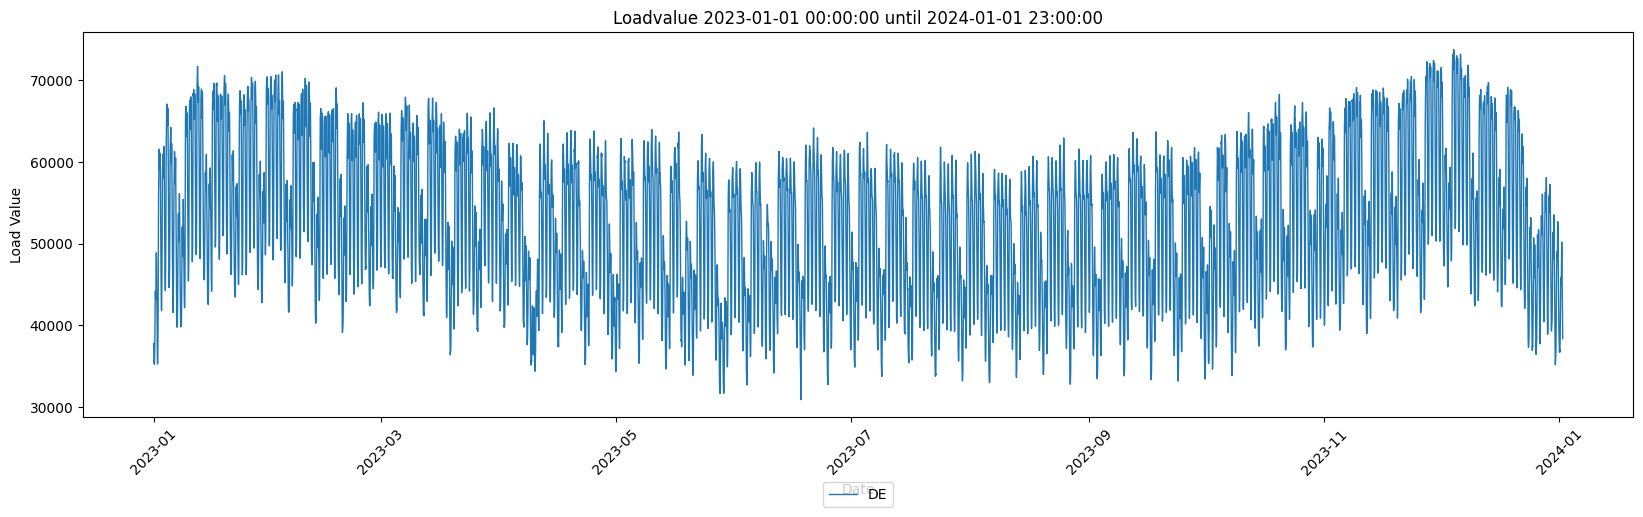

In [115]:
plot(df_de, start_time= '2023-01-01 00:00:00', end_time= '2024-01-01 23:00:00')

## Saving the files for the next steps:

In [118]:
df_de.to_csv("../data/load_value_de_2019_2024.csv", index=False)

## Possible Biases

[Investigate the dataset for any biases that could affect the model’s performance and fairness (e.g., class imbalance, historical biases).]


In [ ]:
# Example: Checking for class imbalance in a classification problem
# sns.countplot(x='target_variable', data=df)

# Your code to investigate possible biases goes here


## Correlations

[Explore correlations between features and the target variable, as well as among features themselves.]


In [ ]:
# Example: Plotting a heatmap to show feature correlations
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()
